In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [13]:
data = pd.read_csv('Data.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [14]:
data = data.drop(["Make","Model","Engine Fuel Type","Driven_Wheels","Transmission Type","Market Category","Vehicle Style","Vehicle Size","Number of Doors","highway MPG","city mpg","Popularity","MSRP","Year"], axis = 1)
data = data.drop_duplicates()
data.head()

,Engine HP,Engine Cylinders
0,335.0,6.0
1,300.0,6.0
3,230.0,6.0
15,320.0,6.0
17,172.0,6.0


In [15]:
print(data.isnull().sum())

Engine HP           4
Engine Cylinders    8
dtype: int64


In [16]:
data = data.dropna()   
data.count()

Engine HP           561
Engine Cylinders    561
dtype: int64

In [17]:
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Engine HP,Engine Cylinders
0,0.999840,0.017908
1,0.999800,0.019996
2,0.999660,0.026078
3,0.999824,0.018747
4,0.999392,0.034863


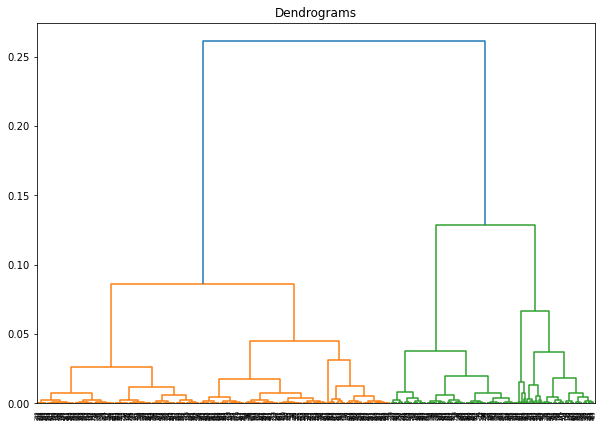

In [19]:

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [41]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,

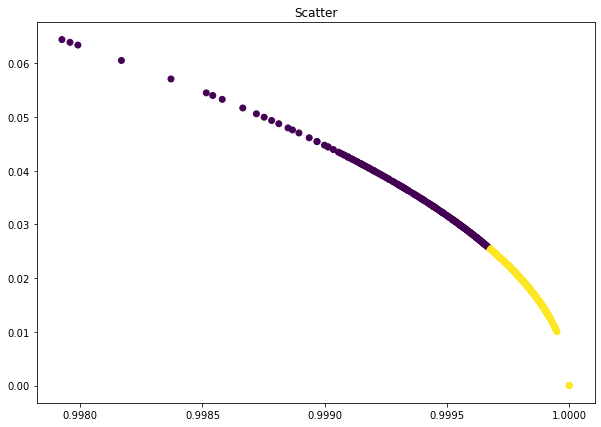

In [35]:
plt.figure(figsize=(10, 7)) 
plt.title("Scatter")
plt.scatter(data_scaled['Engine HP'], data_scaled['Engine Cylinders'], c=cluster.labels_)

In [30]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(data_scaled)
x_scaled

array([[0.9227097 , 0.27814449],
       [0.90362901, 0.31058238],
       [0.83607628, 0.40505067],
       ...,
       [0.59070199, 0.63996021],
       [0.74394265, 0.50621652],
       [0.90067242, 0.31531013]])

In [31]:
kmeans = KMeans(n_clusters = 3, random_state=123)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=123)

In [32]:
print(kmeans.cluster_centers_)

[[0.91599413 0.28361671]
 [0.51128141 0.69174693]
 [0.78069838 0.46493138]]


In [33]:
print(kmeans.labels_)

[0 0 2 0 2 2 2 1 0 0 2 0 0 0 2 2 2 2 1 0 0 2 2 2 1 1 2 2 2 0 0 0 2 1 1 0 0
 0 0 0 2 2 2 1 2 0 0 0 0 0 0 0 2 2 1 2 2 2 0 0 0 0 0 0 0 2 0 2 2 1 2 0 2 2
 2 0 0 0 0 2 2 1 0 2 2 2 1 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0
 0 1 0 1 1 1 1 2 0 0 0 0 2 0 0 0 0 0 2 0 2 2 0 2 1 2 0 0 0 0 2 2 2 0 0 0 0
 0 2 0 2 0 2 2 1 2 2 2 2 2 2 0 0 0 0 2 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 2 2 0 2 0 0 0 0 2 0 0 0 2 2 1 1 1 2 0 2 2 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 2 2 0 0 0 0 0 0 2 1 2 0 2
 0 0 2 1 0 2 2 0 1 2 0 1 2 2 0 2 1 2 0 2 0 0 2 0 2 2 0 0 2 0 0 0 0 1 0 0 0
 0 0 1 2 0 0 1 0 0 2 0 2 2 2 2 2 0 0 2 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 1 2 0 0 0 2 0
 2 0 1 2 2 0 0 1 1 0 0 0 0 1 1 0 0 0 1 2 0 0 0 2 2 1 2 0 0 2 0 0 0 0 0 0 0
 0 0 1 1 2 1 2 1 1 0 2 2 2 0 0 0 0 0 0 1 1 0 2 2 0 2 2 0 0 0 0 2 0 0 0 2 2
 1 2 1 0 0 0 0 0 1 1 1 0 

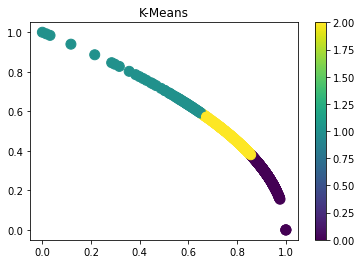

In [37]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = kmeans.labels_, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.title("K-Means")
plt.colorbar (output)
plt.show()